In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)
rcParams['legend.fontsize'] = 16
rcParams['axes.labelsize'] = 16

ModuleNotFoundError: No module named 'matplotlib'

just needed to install matplotlib

In [5]:
import numpy as np
import pandas as pd

# downloading dataset
    

def sigmoid(x, Beta_1, Beta_2):
	y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
	return y
	
beta_1 = 0.10
beta_2 = 1990.0

# logistic function
Y_pred = sigmoid(x_data, beta_1, beta_2)

# plot initial prediction against datapoints
plt.plot(x_data, Y_pred * 15000000000000.)
plt.plot(x_data, y_data, 'ro')	


NameError: name 'x_data' is not defined

okay I'm overwhelmed, try linear regression first

Never mind, RealPython article (good) has a part for nonlinear, too! Source: https://realpython.com/linear-regression-in-python/#polynomial-regression 

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [18]:
x = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]).reshape((-1, 1)) # Resistance values
y = np.array([1, 20, 39, 60, 76, 91, 103, 101, 100, 102, 108, 106, 120, 151, 160, 180, 230])

transformer = PolynomialFeatures(degree=2, include_bias=False) # To add column for x^2

transformer.fit(x) # Fits transformer
x_ = transformer.transform(x) # Creates modified input array
print(x_)

[[5.000e+00 2.500e+01]
 [1.000e+01 1.000e+02]
 [1.500e+01 2.250e+02]
 [2.000e+01 4.000e+02]
 [2.500e+01 6.250e+02]
 [3.000e+01 9.000e+02]
 [3.500e+01 1.225e+03]
 [4.000e+01 1.600e+03]
 [4.500e+01 2.025e+03]
 [5.000e+01 2.500e+03]
 [5.500e+01 3.025e+03]
 [6.000e+01 3.600e+03]
 [6.500e+01 4.225e+03]
 [7.000e+01 4.900e+03]
 [7.500e+01 5.625e+03]
 [8.000e+01 6.400e+03]
 [8.500e+01 7.225e+03]]


In [19]:
model = LinearRegression().fit(x_, y)

print(model)

LinearRegression()


lol can't just print it, nice try

In [20]:
print(model.coef_)

[1.6627709  0.00529928]


okay so I'm pretty sure this means its fit is quadratic

In [21]:
print(model.intercept_)

14.088235294117624


here's my question: did it just fit a linear model using x^2 as the input? Because that doesn't seem valid...

create a plot and see if result makes sense

source: https://swcarpentry.github.io/python-novice-gapminder/09-plotting/index.html

In [22]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Concentration (units)')

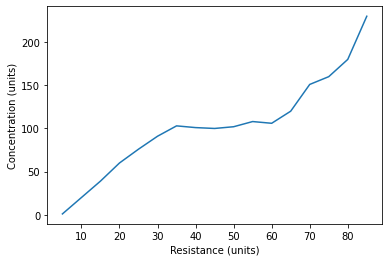

In [23]:
plt.plot(x, y)
plt.xlabel('Resistance (units)')
plt.ylabel('Concentration (units)')

plot equation to see how well it fits graph of points, visually. Source: https://www.geeksforgeeks.org/plot-mathematical-expressions-in-python-using-matplotlib/ 

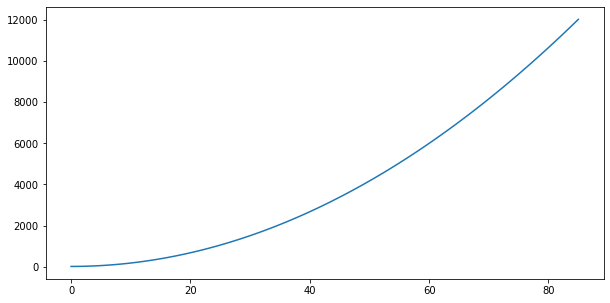

In [26]:
# Creating vectors for x and y axis
res = np.linspace(0, 85, 100)
conc = 1.6627709 * res ** 2 + 0.00529928 * res + 14.088235294117624 # Equation for curve of best fit given coeffs from regressiona analysis
  
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(res, conc)
  
# Show the plot
plt.show()

hm, how get data and equation on same plot?

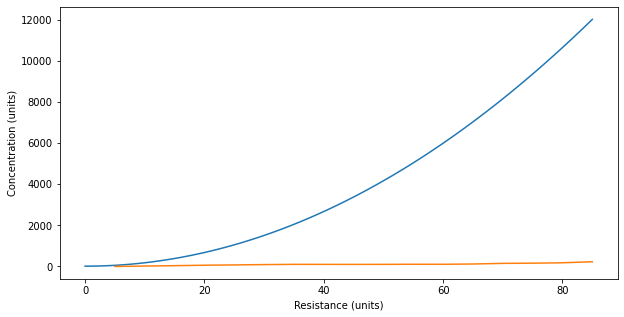

In [27]:
# Creating vectors for x and y axis
res = np.linspace(0, 85, 100)
conc = 1.6627709 * res ** 2 + 0.00529928 * res + 14.088235294117624 # Equation for curve of best fit given coeffs from regressiona analysis
  
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(res, conc)

plt.plot(x, y) # trying to also show data on graph
plt.xlabel('Resistance (units)')
plt.ylabel('Concentration (units)')
  
# Show the plot
plt.show()

not what I want. Try playing with order

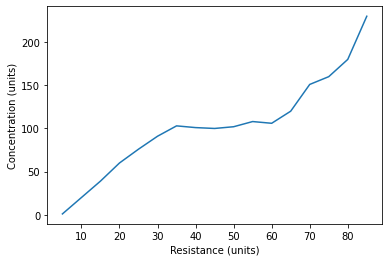

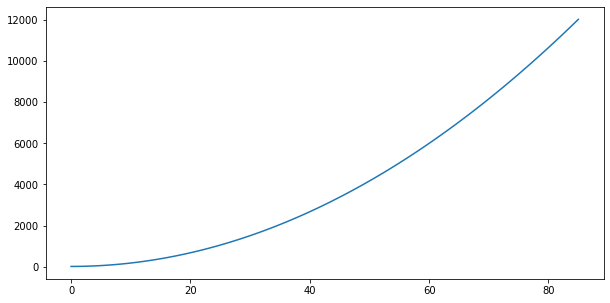

In [28]:
plt.plot(x, y)
plt.xlabel('Resistance (units)')
plt.ylabel('Concentration (units)')


# Creating vectors for x and y axis
res = np.linspace(0, 85, 100)
conc = 1.6627709 * res ** 2 + 0.00529928 * res + 14.088235294117624 # Equation for curve of best fit given coeffs from regressiona analysis
  
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(res, conc)


  
# Show the plot
plt.show()

hm, google line of best fit on scatter plot and see if will work with nonlinear. Source: https://machinelearningmastery.com/curve-fitting-with-python/ 

ValueError: x and y must have same first dimension, but have shapes (80,) and (17, 1)

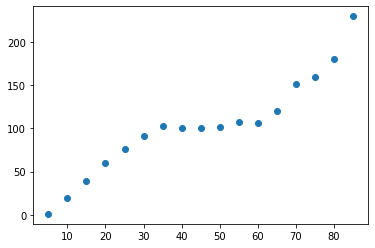

In [38]:
from matplotlib import pyplot

# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = 1.6627709 * x ** 2 + 0.00529928 * x + 14.088235294117624
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

try hybrid way (with help of stack overflow post https://stackoverflow.com/questions/26690480/matplotlib-valueerror-x-and-y-must-have-same-first-dimension)

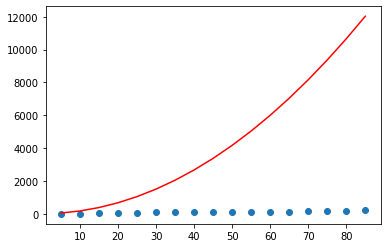

In [39]:
pyplot.scatter(x, y)

plt.plot(x, 1.6627709 * x ** 2 + 0.00529928 * x + 14.088235294117624, 'r-')

(0.0, 300.0)

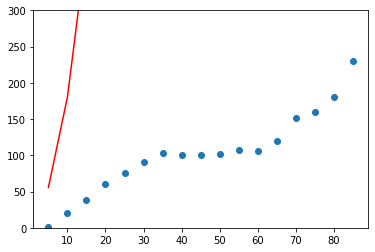

In [40]:
pyplot.scatter(x, y)

plt.plot(x, 1.6627709 * x ** 2 + 0.00529928 * x + 14.088235294117624, 'r-')

#plt.xlim(0.2,1.2)
plt.ylim(0,300)

terrible fit, maybe flip coefficients?

(0.0, 300.0)

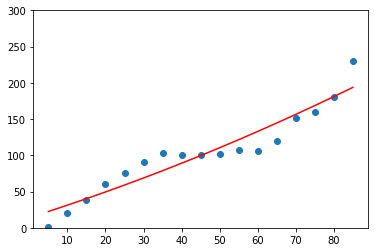

In [41]:
pyplot.scatter(x, y)

plt.plot(x, 0.00529928 * x ** 2 + 1.6627709* x + 14.088235294117624, 'r-') # coefficients flipped

#plt.xlim(0.2,1.2)
plt.ylim(0,300)

okay so better but still awful

Try the method for regression analysis in https://machinelearningmastery.com/curve-fitting-with-python/ (was previously just using it as a source for plotting)

wait, maybe it would be better fit if included `x**3`. try that first.

How know how many powers to go out to? Google that!

In [42]:
transformer2 = PolynomialFeatures(degree=3, include_bias=False) # To add column for x^3

transformer2.fit(x) # Fits transformer
x2_ = transformer.transform(x) # Creates modified input array
print(x2_)

[[5.000e+00 2.500e+01]
 [1.000e+01 1.000e+02]
 [1.500e+01 2.250e+02]
 [2.000e+01 4.000e+02]
 [2.500e+01 6.250e+02]
 [3.000e+01 9.000e+02]
 [3.500e+01 1.225e+03]
 [4.000e+01 1.600e+03]
 [4.500e+01 2.025e+03]
 [5.000e+01 2.500e+03]
 [5.500e+01 3.025e+03]
 [6.000e+01 3.600e+03]
 [6.500e+01 4.225e+03]
 [7.000e+01 4.900e+03]
 [7.500e+01 5.625e+03]
 [8.000e+01 6.400e+03]
 [8.500e+01 7.225e+03]]


how get both x^2 and x^3?

wait hold on, research biosensors to see if I can find what expected degree of polynomial regression should be before going further

**But actually**, will see data once we make measurements so can guess from that the degree, purpose of this coding is just to make sure I can do the modeling even for nonlinear regression in case data is nonlinear. so maybe do that before research

decision: try out ML website's way on same data, quadratic, to see if fit is genuinely that bad or if RealPython method is bad, as I suspect. Then, still do the research because data might be hard to tell degree of by inspection

In [44]:
from numpy import arange

from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c
 

# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

debugging help from https://stackoverflow.com/questions/53926046/result-from-function-call-is-not-an-array-of-floats

In [45]:
from numpy import arange

from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c


array1 = np.asarray(data1).T
x2 , y2 = array1

 

# curve fit
popt, _ = curve_fit(objective, x2, y2)
# summarize the parameter values
a, b, c = popt
print('y2 = %.5f * x2 + %.5f * x2^2 + %.5f' % (a, b, c))
# plot input vs output
pyplot.scatter(x2, y2)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x2), max(x2), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

NameError: name 'data1' is not defined

think I need to do some reading on arrays/format of things to understand what needs to be passed in

RESEARCH SHOWS LIKELY WILL BE LOGARITHMIC, SO ADJUST

In [18]:
# source for understanding arrays: Python Numpy Tutorial (with Jupyter and colab)

# source for log10 method: Python Number log10() Method -- TutorialsPoint

from math import log10

import numpy

from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b):
	return a + b * log10(x)

 
xdata = numpy.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])
#y=objective(xdata,a,b) #source for trying this: scipy.optimize.curve_fit--SciPy v1.7.1 Manual
ydata = numpy.array([1, 20, 39, 60, 76, 91, 103, 101, 100, 102, 108, 106, 120, 151, 160, 180, 230])


# curve fit
popt, _ = curve_fit(objective, xdata, ydata)
# summarize the parameter values
a, b, c = popt
print('y2 = %.5f * x2 + %.5f * x2^2 + %.5f' % (a, b, c))
# plot input vs output
pyplot.scatter(x2, y2)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x2), max(x2), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

TypeError: only size-1 arrays can be converted to Python scalars

not sure why getting this error because article 'Basic Curve Fitting of Scientific Data with Python -- Towards Data Science' says ydata is an array...

try polyfit method suggested in Stack Overflow 'How to do exponential and Logarithmic curve fitting in Python? I found only polynomial fitting':

In [25]:
xdata = numpy.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])

ydata = numpy.array([1, 20, 39, 60, 76, 91, 103, 101, 100, 102, 108, 106, 120, 151, 160, 180, 230])

numpy.polyfit(numpy.log(xdata), ydata, 1)

array([  64.929039  , -129.64350528])

from same stack overflow post using curve_fit:

In [26]:
curve_fit(lambda t, a, b: a + b *numpy.log(t),xdata , ydata)

(array([-129.6435053 ,   64.92903901]),
 array([[ 824.92389392, -220.16848666],
        [-220.16848666,   61.49400184]]))

In [21]:
#try doing without lambda using newfound understanding of how curve_fit works:

def objective(x, a, b):
	return a + b * log10(x)

curve_fit(objective(x), x, y)

TypeError: objective() missing 2 required positional arguments: 'a' and 'b'

do i pass in initial guesses or what?

In [29]:
def objective(x, a, b):
	return a + b * log10(x)

curve_fit(objective(xdata, 1.0, 1.0), xdata, ydata)

TypeError: only size-1 arrays can be converted to Python scalars

try thing from stack overflow 'TypeError: only length-1 arrays... while plot showing':

In [31]:
def objective(x, a, b):
	return a + b * log10(x)

curve_fit(objective(numpy.vectorize(xdata), 1.0, 1.0), xdata, ydata)

TypeError: must be real number, not vectorize

i did it a little different ^ than how they did in the post. Try it more like they did: 

In [32]:
def objective(x, a, b):
	return a + b * log10(x)

objective2 = numpy.vectorize(objective)

curve_fit(objective2(xdata, 1.0, 1.0), xdata, ydata)

TypeError: array([1.69897   , 2.        , 2.17609126, 2.30103   , 2.39794001,
       2.47712125, 2.54406804, 2.60205999, 2.65321251, 2.69897   ,
       2.74036269, 2.77815125, 2.81291336, 2.84509804, 2.87506126,
       2.90308999, 2.92941893]) is not a callable object

so did it create a fit? 

In [34]:
#play with initial guesses (is that what 'a' and 'b' params are?):

def objective(x, a, b):
	return a + b * log10(x)

objective2 = numpy.vectorize(objective)

curve_fit(objective2(xdata, 0.05, 0.001), xdata, ydata)

TypeError: array([0.05069897, 0.051     , 0.05117609, 0.05130103, 0.05139794,
       0.05147712, 0.05154407, 0.05160206, 0.05165321, 0.05169897,
       0.05174036, 0.05177815, 0.05181291, 0.0518451 , 0.05187506,
       0.05190309, 0.05192942]) is not a callable object

from documentation, I don't think that `a` and `b` as passed into objective which is passed into curve fit are initial guesses.

Try with objective without arg as in 'Fitting Example With SciPy curve_fit Function in Python--Data Tech Notes':

In [35]:
def objective(x, a, b):
	return a + b * log10(x)



curve_fit(objective, xdata, ydata)

TypeError: only size-1 arrays can be converted to Python scalars

do I just need to do the `params, covs = ` thing to store the output of `curve_fit`?

In [37]:
def objective(x, a, b):
    return a + b * log10(x)

params, covs = curve_fit(objective, xdata, ydata)

TypeError: only size-1 arrays can be converted to Python scalars

don't know what the problem with function way is, but lambda way works! now figure out plotting:

[-129.6435053    64.92903901]


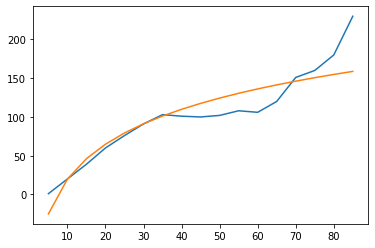

In [40]:
#source: that DataTechNotes article

params, covs = curve_fit(lambda t, a, b: a + b *numpy.log(t),xdata , ydata)
print(params)

import matplotlib.pyplot as plt

plt.plot(xdata, ydata, label='data')
plt.plot(xdata, params[0]+params[1]*numpy.log(xdata))

make sure I didn't switch the coeffs:

[-129.6435053    64.92903901]


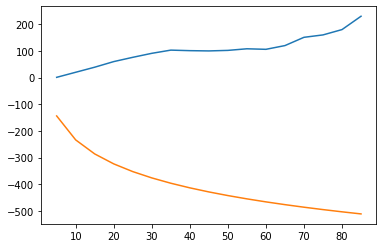

In [41]:
params, covs = curve_fit(lambda t, a, b: a + b *numpy.log(t),xdata , ydata)
print(params)

import matplotlib.pyplot as plt

plt.plot(xdata, ydata, label='data')
plt.plot(xdata, params[1]+params[0]*numpy.log(xdata)) # switched coeffs

nope, first way was right!

now do it where data is scatter plot:

[-129.6435053    64.92903901]


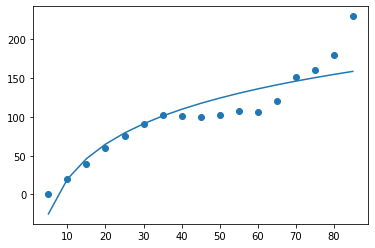

In [42]:
params, covs = curve_fit(lambda t, a, b: a + b *numpy.log(t),xdata , ydata)
print(params)

import matplotlib.pyplot as plt

pyplot.scatter(xdata, ydata, label='data')
plt.plot(xdata, params[0]+params[1]*numpy.log(xdata)) 


#plt.ylim(0,300)

exponential with same method:

[-1.54585335e+02  6.45104247e+00  8.36850408e-03  3.28891975e+00]
-154.58533474237953+6.451042469527244*exp(0.008368504079563426 * x + 3.2889197507498076)


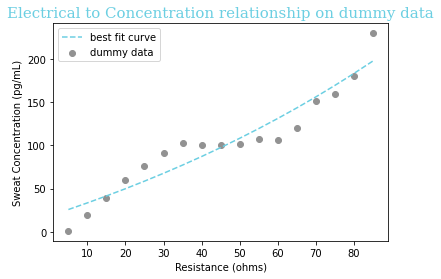

In [3]:
from scipy.optimize import curve_fit
from numpy import array

from numpy import exp


xdata = array([5, 10, 15, 20, 25, 30, 35, 40, 45,
              50, 55, 60, 65, 70, 75, 80, 85])


ydata = array([1, 20, 39, 60, 76, 91, 103, 101, 100,
              102, 108, 106, 120, 151, 160, 180, 230])


params, covariance = curve_fit(
    lambda t, a, b, c, d: a + b * exp(c * t + d), xdata, ydata, p0=(0, 0.5, 0.0005, 0))

import matplotlib.pyplot as plt
from matplotlib import pyplot

print(params)

font1={'family':'serif','color':'#6ccfe2'}

#source on how to specify colors: https://matplotlib.org/stable/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py
# Source for hexidecimal code of color: https://www.color-hex.com/color/6ccfe2
pyplot.scatter(xdata, ydata, label='dummy data',color='#929292') # Source on formatting matplotlib: https://towardsdatascience.com/all-your-matplotlib-questions-answered-420dd95cb4ff
plt.plot(xdata, params[0]+params[1]*exp(params[2] * xdata + params[3]), label='best fit curve',color='#6ccfe2',linestyle='--');
plt.legend();
plt.ylabel('Sweat Concentration (pg/mL)', fontsize = 10); #for y label
plt.xlabel('Resistance (ohms)', fontsize = 10); #for x label
plt.title('Electrical to Concentration relationship on dummy data',fontdict=font1,fontsize=15); #source: https://www.w3schools.com/python/matplotlib_labels.asp

# why 'a' so big and negative? visually, y-intercept should be positive
# OHP, it is because of 'd' value --> ~ -150 + 6e^3

print(f'{params[0]}+{params[1]}*exp({params[2]} * x + {params[3]})')

try linear but also using curve_fit:

[6.53676471 2.13970588]


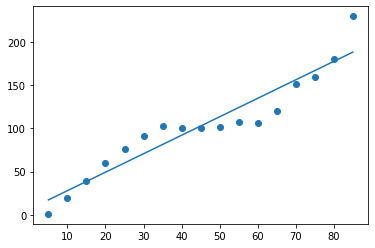

In [1]:
from scipy.optimize import curve_fit
from numpy import array

from numpy import exp


xdata = array([5, 10, 15, 20, 25, 30, 35, 40, 45,
              50, 55, 60, 65, 70, 75, 80, 85])


ydata = array([1, 20, 39, 60, 76, 91, 103, 101, 100,
              102, 108, 106, 120, 151, 160, 180, 230])


params, covariance = curve_fit(
    lambda t, a, b: a + b * t, xdata, ydata)

import matplotlib.pyplot as plt
from matplotlib import pyplot

print(params)

pyplot.scatter(xdata, ydata, label='data')
plt.plot(xdata, params[0]+params[1]*xdata)

got serum:plasma data from Danny, plot to see what kind of fit likely good

ValueError: x and y must be the same size

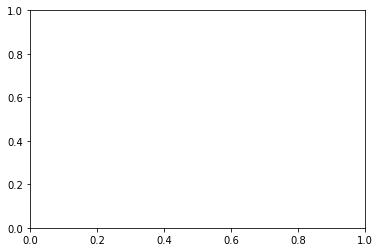

In [3]:
plasma_data=array([60,60,70,70,90,90,110,110,110,120,130,130,160,160,160,170,180,190,220,220,250,350,600])
serum_data=array([90,100,100,120,130,150,150,180,180,180,180,200,200,200,220,220,220,230,230,240,250,250,300,340,360,410,430,900])

pyplot.scatter(plasma_data, serum_data, label='data')

how make them correspond?

Chen said to just use means, can incorporate error if we have time

In [1]:
# got data from Danny, get coeffs for linear:

IL-1b:

a and b: [-0.8591211   0.91146767]
Equation predicting y from x: -0.859121099839232 + 0.9114676655388801x


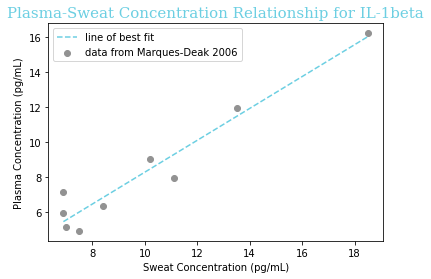

In [38]:
# determining the relationship between Sweat and Plasma Concentration for IL-1beta:

from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy import array

%matplotlib inline

# Data for Sweat Concentration of IL-1b eyeballed from graph (source of error) in Marques-Deak, A., et al. Measurement of cytokines in sweat patches and plasma in healthy women: Validation in a controlled study. Journal of Immunological Methods. 2006, 315, 99-109.
il1bsweat = array([6.9,6.9,7,7.5,8.4,10.2,11.1,13.5, 18.5])

# Data for Plasma Concentration of IL-1b from graph in Marques-Deak et al.
il1bplasma = array([7.1,5.9,5.1,4.9,6.3,9,7.9,11.9,16.2])


# Source: kennytm, 2010. How to do exponential and logarithmic curve
# fitting in Python? I found only polynomial fitting. stack overflow.
# https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
# (accessed September 4, 2021).
# This source is about exponential, but the setup works for linear regression.

# We expect Plasma Concentration to vary linearly with Sweat Concentration according to Marques-Deak et al. 
params, covariance = curve_fit(
    lambda t, a, b: a + b * t, il1bsweat, il1bplasma)

print(f'a and b: {params}')
# [6.53676471 2.13970588]
print(
    f'Equation predicting y from x: {params[0]} + {params[1]}x')

font1={'family':'serif','color':'#6ccfe2'}

#source on how to specify colors: https://matplotlib.org/stable/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py
# Source for hexidecimal code of color: https://www.color-hex.com/color/6ccfe2
pyplot.scatter(il1bsweat, il1bplasma, label='data from Marques-Deak 2006',color='#929292') # Source on formatting matplotlib: https://towardsdatascience.com/all-your-matplotlib-questions-answered-420dd95cb4ff
plt.plot(il1bsweat, params[0] + params[1] * il1bsweat, label='line of best fit',color='#6ccfe2',linestyle='--');
plt.legend();
plt.ylabel('Plasma Concentration (pg/mL)', fontsize = 10); #for y label
plt.xlabel('Sweat Concentration (pg/mL)', fontsize = 10); #for x label
plt.title('Plasma-Sweat Concentration Relationship for IL-1beta',fontdict=font1,fontsize=15); #source: https://www.w3schools.com/python/matplotlib_labels.asp

IL-6:

a and b: [1.57046544 0.68394935]
Equation predicting y from x: 1.5704654392436872 + 0.6839493493025036x


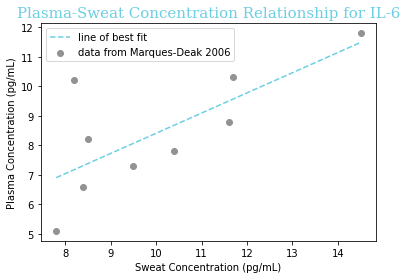

In [1]:
# determining the relationship between Sweat and Plasma Concentration for IL-6:

from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy import array

%matplotlib inline

# Data for Sweat Concentration of IL-6 eyeballed from graph (source of error) in Marques-Deak, A., et al. Measurement of cytokines in sweat patches and plasma in healthy women: Validation in a controlled study. Journal of Immunological Methods. 2006, 315, 99-109.
il6sweat = array([7.8,8.2,8.4,8.5,9.5,10.4,11.6,11.7,14.5])

# Data for Plasma Concentration of IL-6 from graph in Marques-Deak et al.
il6plasma = array([5.1,10.2,6.6,8.2,7.3,7.8,8.8,10.3,11.8])


# Source: kennytm, 2010. How to do exponential and logarithmic curve
# fitting in Python? I found only polynomial fitting. stack overflow.
# https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
# (accessed September 4, 2021).
# This source is about exponential, but the setup works for linear regression.

# We expect Plasma Concentration to vary linearly with Sweat Concentration according to Marques-Deak et al. 
params, covariance = curve_fit(
    lambda t, a, b: a + b * t, il6sweat, il6plasma)

print(f'a and b: {params}')
# [6.53676471 2.13970588]
print(
    f'Equation predicting y from x: {params[0]} + {params[1]}x')



font1={'family':'serif','color':'#6ccfe2'}

#source on how to specify colors: https://matplotlib.org/stable/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py
# Source for hexidecimal code of color: https://www.color-hex.com/color/6ccfe2
pyplot.scatter(il6sweat, il6plasma, label='data from Marques-Deak 2006',color='#929292') # Source on formatting matplotlib: https://towardsdatascience.com/all-your-matplotlib-questions-answered-420dd95cb4ff
plt.plot(il6sweat, params[0] + params[1] * il6sweat, label='line of best fit',color='#6ccfe2',linestyle='--');
plt.legend();
plt.ylabel('Plasma Concentration (pg/mL)', fontsize = 10); #for y label
plt.xlabel('Sweat Concentration (pg/mL)', fontsize = 10); #for x label
plt.title('Plasma-Sweat Concentration Relationship for IL-6',fontdict=font1,fontsize=15); #source: https://www.w3schools.com/python/matplotlib_labels.asp

TNF-a:

a and b: [-0.36106251  0.79036079]
Equation predicting y from x: -0.3610625115091586 + 0.7903607861416451x


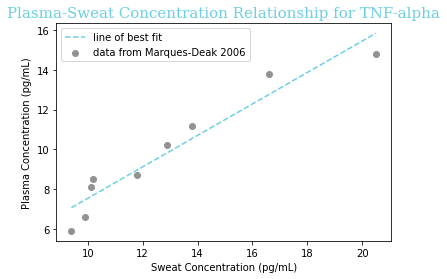

In [2]:
# determining the relationship between Sweat and Plasma Concentration for TNF-alpha:

from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy import array

%matplotlib inline

# Data for Sweat Concentration of TNF-a eyeballed from graph (source of error) in Marques-Deak, A., et al. Measurement of cytokines in sweat patches and plasma in healthy women: Validation in a controlled study. Journal of Immunological Methods. 2006, 315, 99-109.
tnfasweat = array([9.4,9.9,10.1,10.2,11.8,12.9,13.8,16.6,20.5])

# Data for Plasma Concentration of TNF-a from graph in Marques-Deak et al.
tnfaplasma = array([5.9,6.6,8.1,8.5,8.7,10.2,11.2,13.8,14.8])


# Source: kennytm, 2010. How to do exponential and logarithmic curve
# fitting in Python? I found only polynomial fitting. stack overflow.
# https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
# (accessed September 4, 2021).
# This source is about exponential, but the setup works for linear regression.

# We expect Plasma Concentration to vary linearly with Sweat Concentration according to Marques-Deak et al. 
params, covariance = curve_fit(
    lambda t, a, b: a + b * t, tnfasweat, tnfaplasma)

print(f'a and b: {params}')
# [6.53676471 2.13970588]
print(
    f'Equation predicting y from x: {params[0]} + {params[1]}x')



font1={'family':'serif','color':'#6ccfe2'}

#source on how to specify colors: https://matplotlib.org/stable/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py
# Source for hexidecimal code of color: https://www.color-hex.com/color/6ccfe2
pyplot.scatter(tnfasweat, tnfaplasma, label='data from Marques-Deak 2006',color='#929292') # Source on formatting matplotlib: https://towardsdatascience.com/all-your-matplotlib-questions-answered-420dd95cb4ff
plt.plot(tnfasweat, params[0] + params[1] * tnfasweat, label='line of best fit',color='#6ccfe2',linestyle='--');
plt.legend();
plt.ylabel('Plasma Concentration (pg/mL)', fontsize = 10); #for y label
plt.xlabel('Sweat Concentration (pg/mL)', fontsize = 10); #for x label
plt.title('Plasma-Sweat Concentration Relationship for TNF-alpha',fontdict=font1,fontsize=15); #source: https://www.w3schools.com/python/matplotlib_labels.asp

Testing imperfect CRP concentration vs resistance data:

a, b, c, and d: [8.40639494e+01 1.58509081e+00 4.53282650e-03 4.49748946e-01]
Equation predicting CRP Sweat Concentration (y) from Resistance (x): 84.0639494411618 + 1.5850908123701606e^(0.004532826501465057x + 0.44974894596816856)


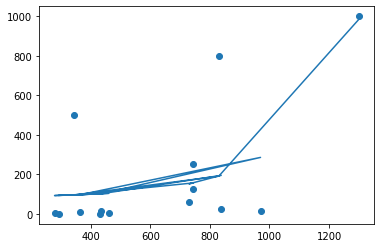

In [7]:
# Source on numpy data types: Johnson, J. Python Numpy Tutorial (with
# Jupyter and Colab). CS231n Convolutional Neural Networks for Visual
# Recognition. https://cs231n.github.io/python-numpy-tutorial/ (accessed
# September 4, 2021).

from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy import array
# We expect Concentration to vary with the exponential of Resistance.
# Source: Cai, H.; Lee T.M.; Hsing, I. Label-free protein recognition
# using an aptamer-based impedance measurement assay. Sensors and
# Actuators B: Chemical. 2006, 114, 433-437.
from numpy import exp

# Dummy data for Resistance (generated by hand, which is not standard
# procedure):
xdata = array([294, 433, 279, 461, 364, 970, 435, 838, 730, 745, 745, 345, 830, 1300])

# Corresponding Concentration (in sweat) dummy data points (same procedure):
ydata = array([0, 1.6, 3.13, 6.25, 7.8, 12.5, 15.63,
              25, 62.5, 125, 250, 500, 800, 1000])


# Source: kennytm, 2010. How to do exponential and logarithmic curve
# fitting in Python? I found only polynomial fitting. stack overflow.
# https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
# (accessed September 4, 2021).

# a, b, c, and d are parameters (constants) to be determined, t is
# Resistance, and a + b*log(t) is Concentration
# p0 is our initial guesses for a, b, c, and d, respectively.
# We don't use covariance, just storing it because curve_fit yields two
# outputs.
params, covariance = curve_fit(
    lambda t, a, b, c, d: a + b * exp(c * t + d), xdata, ydata, p0=(0, 1, 0.001, 0))

print(f'a, b, c, and d: {params}')

print(
    f'Equation predicting CRP Sweat Concentration (y) from Resistance (x): {params[0]} + {params[1]}e^({params[2]}x + {params[3]})')


pyplot.scatter(xdata, ydata, label='data')
plt.plot(xdata, params[0] + params[1] * exp(params[2] * xdata + params[3]))

# Source: Munir, 2016. Matplotlib plots aren't shown when running file
# from bash terminal. stack overflow.
# https://stackoverflow.com/questions/36269746/matplotlib-plots-arent-shown-when-running-file-from-bash-terminal
# (accessed September 9, 2021).
plt.show()


above cell's code copied from Exponential Regression Framework, adapted to CRP. used data points for Aptamer slide (as opposed to blank slide), excluding bad slides. Thinking that blank slides probably are important control but don't affect math of this model

troubleshooting crappy graph by adjusting initial guesses:

a, b, c, and d: [8.40639494e+01 1.58509081e+00 4.53282650e-03 4.49748946e-01]
Equation predicting CRP Sweat Concentration (y) from Resistance (x): 84.0639494411618 + 1.5850908123701606e^(0.004532826501465057x + 0.44974894596816856)


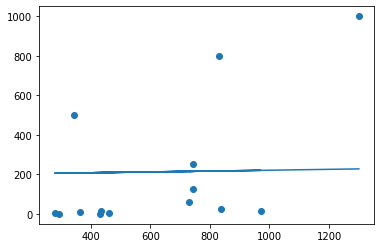

In [12]:
# Source on numpy data types: Johnson, J. Python Numpy Tutorial (with
# Jupyter and Colab). CS231n Convolutional Neural Networks for Visual
# Recognition. https://cs231n.github.io/python-numpy-tutorial/ (accessed
# September 4, 2021).

from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy import array
# We expect Concentration to vary with the exponential of Resistance.
# Source: Cai, H.; Lee T.M.; Hsing, I. Label-free protein recognition
# using an aptamer-based impedance measurement assay. Sensors and
# Actuators B: Chemical. 2006, 114, 433-437.
from numpy import exp

# Dummy data for Resistance (generated by hand, which is not standard
# procedure):
xdata = array([294, 433, 279, 461, 364, 970, 435, 838, 730, 745, 745, 345, 830, 1300])

# Corresponding Concentration (in sweat) dummy data points (same procedure):
ydata = array([0, 1.6, 3.13, 6.25, 7.8, 12.5, 15.63,
              25, 62.5, 125, 250, 500, 800, 1000])


# Source: kennytm, 2010. How to do exponential and logarithmic curve
# fitting in Python? I found only polynomial fitting. stack overflow.
# https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
# (accessed September 4, 2021).

# a, b, c, and d are parameters (constants) to be determined, t is
# Resistance, and a + b*log(t) is Concentration
# p0 is our initial guesses for a, b, c, and d, respectively.
# We don't use covariance, just storing it because curve_fit yields two
# outputs.
params, covariance = curve_fit(
    lambda t, a, b, c, d: a + b * exp(c * t + d), xdata, ydata, p0=(0, 1, 0.001, 0))

print(f'a, b, c, and d: {params}')

print(
    f'Equation predicting CRP Sweat Concentration (y) from Resistance (x): {params[0]} + {params[1]}e^({params[2]}x + {params[3]})')


pyplot.scatter(xdata, ydata, label='data')
#plt.plot(xdata, params[0] + params[1] * exp(params[2] * xdata + params[3]))
plt.plot(xdata, 0 + 200 * exp(0.0001 * xdata + 0))

# Source: Munir, 2016. Matplotlib plots aren't shown when running file
# from bash terminal. stack overflow.
# https://stackoverflow.com/questions/36269746/matplotlib-plots-arent-shown-when-running-file-from-bash-terminal
# (accessed September 9, 2021).
plt.show()


wait, is curve in Exponential Framework graph only apparently smooth but actually just separate lines? It seems from the docs https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html that what .plot does is plot points and connect them with lines

try keeping y of .plot the same, but instead of xdata, use lots of evenly spaced points to make it appear smooth:

a, b, c, and d: [8.40639494e+01 1.58509081e+00 4.53282650e-03 4.49748946e-01]
Equation predicting CRP Sweat Concentration (y) from Resistance (x): 84.0639494411618 + 1.5850908123701606e^(0.004532826501465057x + 0.44974894596816856)


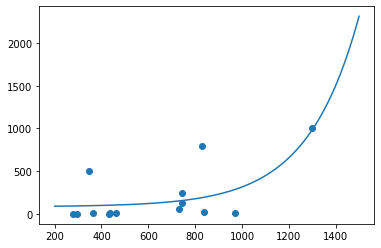

In [14]:
# Source on numpy data types: Johnson, J. Python Numpy Tutorial (with
# Jupyter and Colab). CS231n Convolutional Neural Networks for Visual
# Recognition. https://cs231n.github.io/python-numpy-tutorial/ (accessed
# September 4, 2021).

from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy import array
# We expect Concentration to vary with the exponential of Resistance.
# Source: Cai, H.; Lee T.M.; Hsing, I. Label-free protein recognition
# using an aptamer-based impedance measurement assay. Sensors and
# Actuators B: Chemical. 2006, 114, 433-437.
from numpy import exp

# Dummy data for Resistance (generated by hand, which is not standard
# procedure):
xdata = array([294, 433, 279, 461, 364, 970, 435, 838, 730, 745, 745, 345, 830, 1300])

# Corresponding Concentration (in sweat) dummy data points (same procedure):
ydata = array([0, 1.6, 3.13, 6.25, 7.8, 12.5, 15.63,
              25, 62.5, 125, 250, 500, 800, 1000])


# Source: kennytm, 2010. How to do exponential and logarithmic curve
# fitting in Python? I found only polynomial fitting. stack overflow.
# https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
# (accessed September 4, 2021).

# a, b, c, and d are parameters (constants) to be determined, t is
# Resistance, and a + b*log(t) is Concentration
# p0 is our initial guesses for a, b, c, and d, respectively.
# We don't use covariance, just storing it because curve_fit yields two
# outputs.
params, covariance = curve_fit(
    lambda t, a, b, c, d: a + b * exp(c * t + d), xdata, ydata, p0=(0, 1, 0.001, 0))

print(f'a, b, c, and d: {params}')

print(
    f'Equation predicting CRP Sweat Concentration (y) from Resistance (x): {params[0]} + {params[1]}e^({params[2]}x + {params[3]})')

from numpy import linspace # Source: https://www.geeksforgeeks.org/plot-mathematical-expressions-in-python-using-matplotlib/
xdata_displayed = linspace(200, 1500, 100)

pyplot.scatter(xdata, ydata, label='data')
#plt.plot(xdata, params[0] + params[1] * exp(params[2] * xdata + params[3]))
plt.plot(xdata_displayed, params[0] + params[1] * exp(params[2] * xdata_displayed + params[3]))

# Source: Munir, 2016. Matplotlib plots aren't shown when running file
# from bash terminal. stack overflow.
# https://stackoverflow.com/questions/36269746/matplotlib-plots-arent-shown-when-running-file-from-bash-terminal
# (accessed September 9, 2021).
plt.show()


aha! Now see if shifting initial guess to the left results in a fit that looks visually better

a, b, c, and d: [8.40629918e+01 1.01301512e-08 4.53279289e-03 1.93181851e+01]
Equation predicting CRP Sweat Concentration (y) from Resistance (x): 84.0629917654357 + 1.013015118326873e-08e^(0.004532792891346644x + 19.318185115509042)


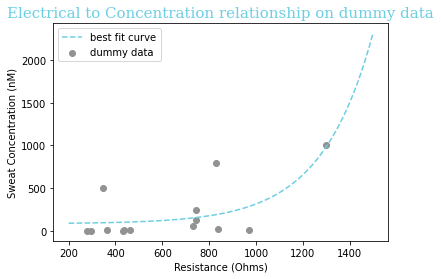

In [4]:
# Source on numpy data types: Johnson, J. Python Numpy Tutorial (with
# Jupyter and Colab). CS231n Convolutional Neural Networks for Visual
# Recognition. https://cs231n.github.io/python-numpy-tutorial/ (accessed
# September 4, 2021).

from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy import array
# We expect Concentration to vary with the exponential of Resistance.
# Source: Cai, H.; Lee T.M.; Hsing, I. Label-free protein recognition
# using an aptamer-based impedance measurement assay. Sensors and
# Actuators B: Chemical. 2006, 114, 433-437.
from numpy import exp

# 
xdata = array([294, 433, 279, 461, 364, 970, 435, 838, 730, 745, 745, 345, 830, 1300]) # Resistance data for CRP

#
ydata = array([0, 1.6, 3.13, 6.25, 7.8, 12.5, 15.63,
              25, 62.5, 125, 250, 500, 800, 1000]) # Sweat Concentration data for CRP


# Source: kennytm, 2010. How to do exponential and logarithmic curve
# fitting in Python? I found only polynomial fitting. stack overflow.
# https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
# (accessed September 4, 2021).

# a, b, c, and d are parameters (constants) to be determined, t is
# Resistance, and a + b*log(t) is Concentration
# p0 is our initial guesses for a, b, c, and d, respectively.
# We don't use covariance, just storing it because curve_fit yields two
# outputs.
params, covariance = curve_fit(
    lambda t, a, b, c, d: a + b * exp(c * t + d), xdata, ydata, p0=(0, 1, (1/700), 30))

print(f'a, b, c, and d: {params}')

print(
    f'Equation predicting CRP Sweat Concentration (y) from Resistance (x): {params[0]} + {params[1]}e^({params[2]}x + {params[3]})')

from numpy import linspace # Source: https://www.geeksforgeeks.org/plot-mathematical-expressions-in-python-using-matplotlib/
xdata_displayed = linspace(200, 1500, 100)


#source on how to specify colors: https://matplotlib.org/stable/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py
# Source for hexidecimal code of color: https://www.color-hex.com/color/6ccfe2
# Source on formatting matplotlib: https://towardsdatascience.com/all-your-matplotlib-questions-answered-420dd95cb4ff
font1={'family':'serif','color':'#6ccfe2'}
pyplot.scatter(xdata, ydata, label='dummy data',color='#929292') 
plt.plot(xdata_displayed, params[0]+params[1]*exp(params[2] * xdata_displayed + params[3]), label='best fit curve',color='#6ccfe2',linestyle='--');
plt.legend();
plt.ylabel('Sweat Concentration (nM)', fontsize = 10); #for y label
plt.xlabel('Resistance (Ohms)', fontsize = 10); #for x label
plt.title('Electrical to Concentration relationship on dummy data',fontdict=font1,fontsize=15); #source: https://www.w3schools.com/python/matplotlib_labels.asp


# Source: Munir, 2016. Matplotlib plots aren't shown when running file
# from bash terminal. stack overflow.
# https://stackoverflow.com/questions/36269746/matplotlib-plots-arent-shown-when-running-file-from-bash-terminal
# (accessed September 9, 2021).
plt.show()






try ommitting what appears to be an overly influential data point (~1300, ~1100):

In [33]:
# Source on numpy data types: Johnson, J. Python Numpy Tutorial (with
# Jupyter and Colab). CS231n Convolutional Neural Networks for Visual
# Recognition. https://cs231n.github.io/python-numpy-tutorial/ (accessed
# September 4, 2021).

from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy import array
# We expect Concentration to vary with the exponential of Resistance.
# Source: Cai, H.; Lee T.M.; Hsing, I. Label-free protein recognition
# using an aptamer-based impedance measurement assay. Sensors and
# Actuators B: Chemical. 2006, 114, 433-437.
from numpy import exp

# Dummy data for Resistance (generated by hand, which is not standard
# procedure):
xdata = array([294, 433, 279, 461, 364, 970, 435, 838, 730, 745, 745, 345, 830])

# Corresponding Concentration (in sweat) dummy data points (same procedure):
ydata = array([0, 1.6, 3.13, 6.25, 7.8, 12.5, 15.63,
              25, 62.5, 125, 250, 500, 800])


# Source: kennytm, 2010. How to do exponential and logarithmic curve
# fitting in Python? I found only polynomial fitting. stack overflow.
# https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
# (accessed September 4, 2021).

# a, b, c, and d are parameters (constants) to be determined, t is
# Resistance, and a + b*log(t) is Concentration
# p0 is our initial guesses for a, b, c, and d, respectively.
# We don't use covariance, just storing it because curve_fit yields two
# outputs.
params, covariance = curve_fit(
    lambda t, a, b, c, d: a + b * exp(c * t + d), xdata, ydata, p0=(0, 10, 0.001, -0.65))

print(f'a, b, c, and d: {params}')

print(
    f'Equation predicting CRP Sweat Concentration (y) from Resistance (x): {params[0]} + {params[1]}e^({params[2]}x + {params[3]})')

from numpy import linspace # Source: https://www.geeksforgeeks.org/plot-mathematical-expressions-in-python-using-matplotlib/
xdata_displayed = linspace(200, 1500, 100)

pyplot.scatter(xdata, ydata, label='data')
#plt.plot(xdata, params[0] + params[1] * exp(params[2] * xdata + params[3]))
plt.plot(xdata_displayed, params[0] + params[1] * exp(params[2] * xdata_displayed + params[3]))

# Source: Munir, 2016. Matplotlib plots aren't shown when running file
# from bash terminal. stack overflow.
# https://stackoverflow.com/questions/36269746/matplotlib-plots-arent-shown-when-running-file-from-bash-terminal
# (accessed September 9, 2021).
plt.show()


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

come back to this once have better data

how bad of a fit would it be if we just did a line of best fit? try using https://realpython.com/linear-regression-in-python/ method that can display R-squared value:

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

test_linear_x = np.array([294, 433, 279, 461, 364, 970, 435, 838, 730, 745, 745, 345, 830, 1300]).reshape((-1, 1))
test_linear_y = np.array([0, 1.6, 3.13, 6.25, 7.8, 12.5, 15.63, 25, 62.5, 125, 250, 500, 800, 1000])

model = LinearRegression()

model.fit(test_linear_x, test_linear_y)

r_sq = model.score(test_linear_x, test_linear_y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.3380100419907339


HA so linear won't work, plot data for lactoferrin to see if two-bell-curve-like appearance is consistent across biomarkers **and experiments??** or just me mentally overfitting:

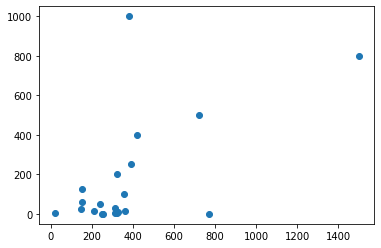

In [7]:
# Source on numpy data types: Johnson, J. Python Numpy Tutorial (with
# Jupyter and Colab). CS231n Convolutional Neural Networks for Visual
# Recognition. https://cs231n.github.io/python-numpy-tutorial/ (accessed
# September 4, 2021).

from matplotlib import pyplot
import matplotlib.pyplot as plt
from numpy import array


# 
xdataLF2 = array([255, 249, 770, 312.7, 17.4, 323.7, 328, 207.9, 360, 145.4, 310, 236.6, 151.1, 354, 148.9, 321.1, 390, 418.5, 720, 1500, 380.5])

#
ydataLF2 = array([0, 1.6, 1.9, 3.13, 3.9, 6.25, 7.8, 12.5, 15.63, 25, 31.5, 50, 62.5, 100, 125, 200, 250, 400, 500, 800, 1000])



from numpy import linspace # Source: https://www.geeksforgeeks.org/plot-mathematical-expressions-in-python-using-matplotlib/
xdata_displayed = linspace(200, 1600, 100)

pyplot.scatter(xdataLF2, ydataLF2, label='data')
#plt.plot(xdata, params[0] + params[1] * exp(params[2] * xdata + params[3]))
#plt.plot(xdata_displayed, params[0] + params[1] * exp(params[2] * xdata_displayed + params[3]))

# Source: Munir, 2016. Matplotlib plots aren't shown when running file
# from bash terminal. stack overflow.
# https://stackoverflow.com/questions/36269746/matplotlib-plots-arent-shown-when-running-file-from-bash-terminal
# (accessed September 9, 2021).
# plt.show()

okay so looks totally different

try linear on that data:

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

test_linear_x2 = np.array([255, 249, 770, 312.7, 17.4, 323.7, 328, 207.9, 360, 145.4, 310, 236.6, 151.1, 354, 148.9, 321.1, 390, 418.5, 720, 1500, 380.5]).reshape((-1, 1))
test_linear_y2 = np.array([0, 1.6, 1.9, 3.13, 3.9, 6.25, 7.8, 12.5, 15.63, 25, 31.5, 50, 62.5, 100, 125, 200, 250, 400, 500, 800, 1000])

model2 = LinearRegression()

model2.fit(test_linear_x2, test_linear_y2)

r_sq = model.score(test_linear_x2, test_linear_y2)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.10775695509073491


wow that's bad